In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
# load model
model = tf.keras.models.load_model('./models/object_detection_200_epochs.h5')
print('model loaded successfully')

model loaded successfully


In [4]:
path = './images\\N150.jpeg'
image = load_img(path) # PIL object

from PIL import Image, ImageEnhance

im = image

enhancer = ImageEnhance.Sharpness(im)

factor = 3
im_s_1 = enhancer.enhance(factor)
im_s_1.save('sharpened-image.png')
image =im_s_1

##
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output

In [5]:
# size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)

Height of the image = 250
Width of the image = 500


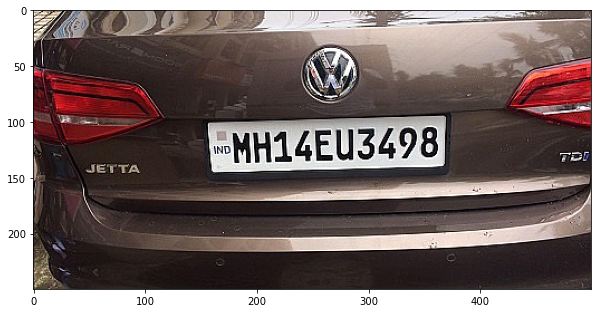

In [6]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [7]:
image_arr_224.shape

(224, 224, 3)

In [8]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [9]:
# make predictions
coords = model.predict(test_arr)
coords

1/1 [==============================] - 8s 8s/step


array([[0.3560108 , 0.7412397 , 0.39888293, 0.5806361 ]], dtype=float32)

In [10]:
# denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[178.00539732, 370.61986327,  99.72073138, 145.15902102]])

In [11]:
coords = coords.astype(np.int32)
coords

array([[178, 370,  99, 145]])

(178, 99) (370, 145)


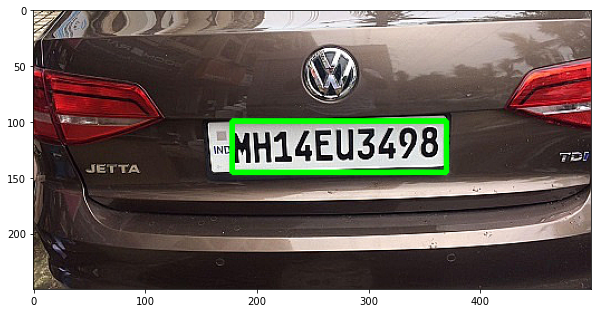

In [12]:
# draw bounding on top the image
xmin, xmax,ymin,ymax = coords[0]
pt1 =(xmin,ymin)
pt2 =(xmax,ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [15]:
## KNOWN SAMPLES[200 Epochs model]:-

# For 50 known samples around 5 were not on the plate, and less than or equal to 10 were not perfectly on the plate(covering some part), rest max were perfectly(covering all reqd digits) on it. 

In [13]:
# create pipeline
path = './images/N207.jpeg'
def object_detection(path):
    image = load_img(path) # PIL object

    from PIL import Image, ImageEnhance

    im = image

    enhancer = ImageEnhance.Sharpness(im)

    factor = 3
    im_s_1 = enhancer.enhance(factor)
    im_s_1.save('sharpened-image.png')
    image =im_s_1
    
    ##
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # make predictions
    coords = model.predict(test_arr)
    # denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # draw bounding on top the image
    xmin, xmax,ymin,ymax = coords[0]
    pt1 =(xmin,ymin)
    pt2 =(xmax,ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords


1/1 [==============================] - 1s 607ms/step
(416, 587) (968, 712)


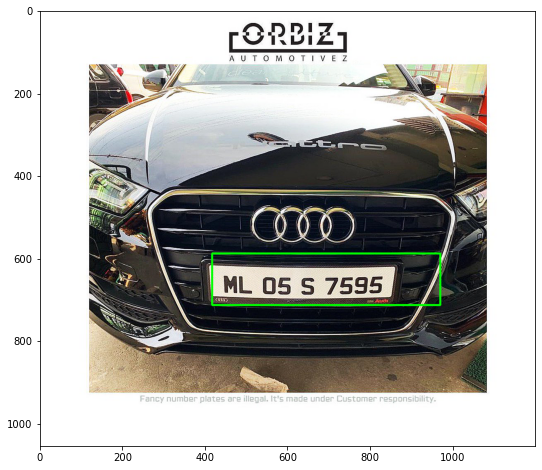

In [14]:
## UNSEEN images: - 

path = './external_img/1.jpg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [ ]:
## UNSEEN IMAGES Inference :-

In [ ]:
## 110 EPOCHS Model (30 Images):-

## Not on Plate: 1.jpg, 2.jpg, d.jfif, new.jpg, images (1).jfif, ---->>(5)
## On plate, not perfectly: 3.jpg, 4.jpg, 7777.jpg, a.jpg, b.jpeg, back.jpg, c.jfif, car_front.jpg, fr_numplate.jpg, ideal.png, images.jfif, new_img.png, plate.png, sharpened-image.png, 628a4a0bb0627a8dd4731aad6ff8d6da.jpg, acrylic-number-plate-002.jpg, car_with_covid_19_number_plate.jpg, yamaha-fz-s-fi-v2-1576069978-200.jpg ---->>(18)   
## Perfectly on plate: 1004194-bh-plate (1).jpg, 2017-08-18.jpg, bike.jfif, e.jpg, f.jpg, acrylic-number-plate-003.jpg, honda-livo-110-1498972523.jpg, ---->>(7)

In [ ]:
## 200 EPOCHS Model (30 Images):-

## Not on Plate: new_img.png, images (1).jfif ---->>(2)
## On plate, not perfectly: 1004194-bh-plate (1).jpg, 2.jpg, 2017-08-18.jpg, 3.jpg, a.jpg, b.jpeg, c.jfif, car_front.jpg, d.jfif, fr_numplate.jpg, ideal.png, new.jpg, plate.png, acrylic-number-plate-002.jpg, car_with_covid_19_number_plate.jpg, honda-livo-110-1498972523.jpg, yamaha-fz-s-fi-v2-1576069978-200.jpg ---->>(17) 
## Perfectly on plate: 1.jpg, 4.jpg, 7777.jpg, back.jpg, bike.jfif, e.jpg, f.jpg, images.jfif, sharpened-image.png, 628a4a0bb0627a8dd4731aad6ff8d6da.jpg, acrylic-number-plate-003.jpg ---->>(11)

# Optical Character Recognition - OCR

In [ ]:
import pytesseract 
from PIL import Image as im

In [ ]:
#path = './images/N112.jpeg'
path = './external_img/1.jpg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [ ]:
######
''''
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Load image, grayscale, Otsu's threshold, invert
#image = cv2.imread('1.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
invert = 255 - thresh

# OCR
data = pytesseract.image_to_string(invert, lang='eng', config='--psm 6')
print(data)

cv2.imshow('thresh', thresh)
cv2.imshow('invert', invert)
cv2.waitKey()
''''''''''
######



In [ ]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]
data = im.fromarray(roi)
data.save('g.png')

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Load image, grayscale, Otsu's threshold, invert
image = cv2.imread('g.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
invert = 255 - thresh

# OCR
data = pytesseract.image_to_string(invert, lang='eng', config='--psm 6')
print(data)

cv2.imshow('thresh', thresh)
cv2.imshow('invert', invert)
cv2.waitKey(0)
cv2.destroyAllWindows()


69 U GUI



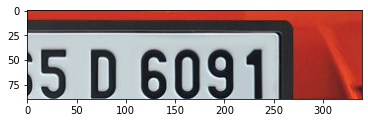

In [36]:
plt.imshow(roi)
plt.show()

In [51]:

##---------------
#plt.imsave('roi.jpeg', roi)


In [29]:
#from PIL import Image, ImageEnhance

#im = Image.open("roi.jpeg")

#enhancer = ImageEnhance.Sharpness(im)

#factor = 5
#im_s_1 = enhancer.enhance(factor)
#im_s_1.save('sharpened-image.png')


In [ ]:
## Convert back to numpy array

In [37]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\\tesseract'


In [38]:
# extract text from image
text = pytesseract.image_to_string(roi)
print(text)

5 D609 1 tee



In [ ]:
## Pytesseract not returning anything for some images.
